In [1]:
import sys
sys.path.insert(0, '../src/data')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import bame_datastore
bame_datastore.lib

Found local clean copy of Local_Authority_Districts__December_2017__Boundaries_in_the_UK__WGS84_
Found local clean copy of fbook_covid_cases
Found local clean copy of BAME_report_cases
Found local clean copy of BAME_report_deaths
Found local clean copy of bame_excess_deaths
Found local clean copy of ons_deaths
Found local clean copy of ethnicity_2011
Found local clean copy of furlough_data
Found local clean copy of key_workers
Found local clean copy of deprivation_data
Found local clean copy of population_est_data


{'mortality': ['fbook_covid_data',
  'bame_rpt_deaths',
  'bame_rpt_excess_deaths',
  'ons_deaths'],
 'explanatory': ['ethnicity_data',
  'bame_rpt_cases',
  'furlough_data',
  'key_workers',
  'deprivation',
  'pop_est'],
 'other': ['lad_geog']}

# Causal Nex

https://causalnex.readthedocs.io/en/latest/03_tutorial/03_tutorial.html

/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/pygraphviz/agraph.py:1367: RuntimeWarning: Warning: node 'deaths_all', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


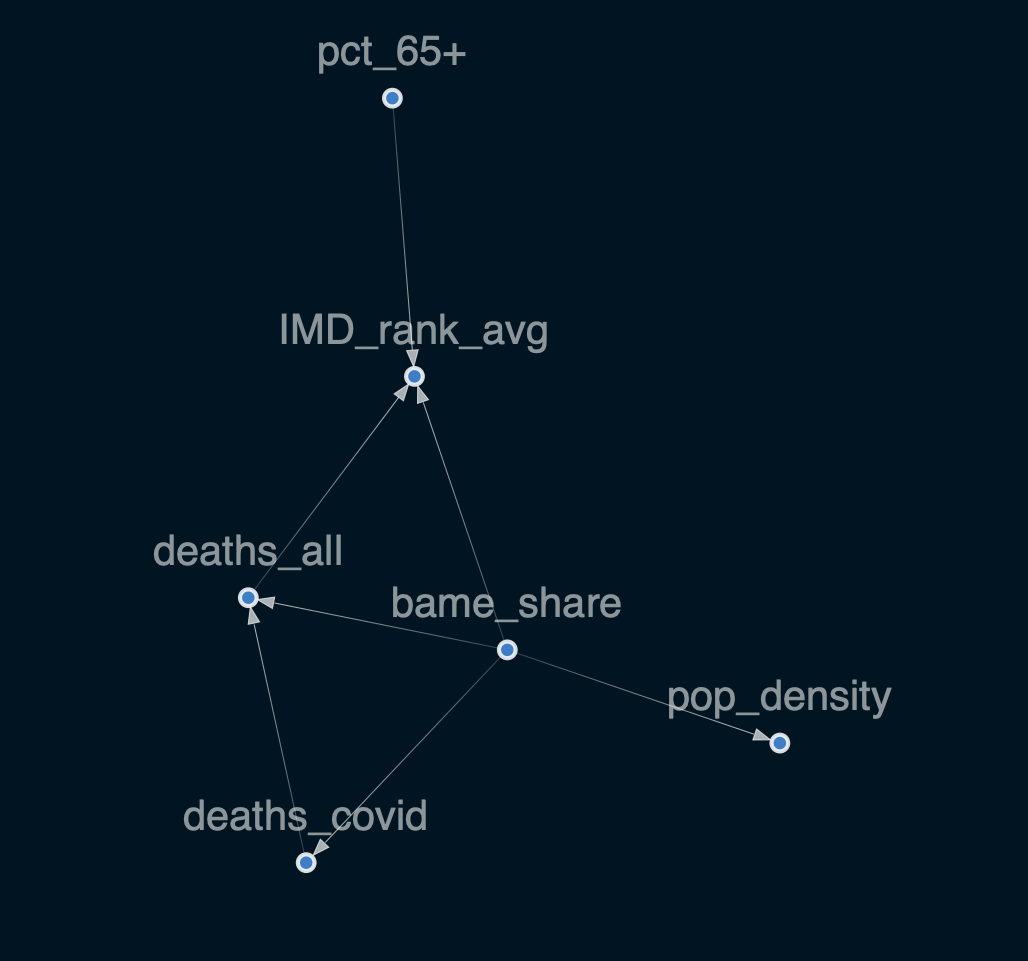

In [3]:
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image


df_raw = pd.read_csv("../data/processed/master_df.csv", index_col=0).dropna()
df_raw["bame_share"] = df_raw.Other+df_raw.Black_African_Caribbean+df_raw.Asian+df_raw.Mixed
nex_df = df_raw.copy()

nex_df.drop(columns=["Area Name", "covid_deaths_pop", "geometry","IMD_rank_std","area", "total_pop",
                     "White", "Mixed", "Black_African_Caribbean","Asian","Other"], inplace=True)

sm = from_pandas(nex_df, tabu_edges=[("deaths_covid", "IMD_rank_avg"),
                                    ("deaths_covid", "pop_density")])
sm.remove_edges_below_threshold(0.8)

viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.9"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))